In [1]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import os
from PIL import Image
import csv
import matplotlib.pyplot as plt
import math
import random

example_img_filename = "data/IMG/center_2016_12_01_13_30_48_287.jpg"
train_data_folder = "combined_data/"
csv_filename = "combined_data/combined_driving_log.csv"
csv_filename_random = "combined_data/random_combined_driving_log.csv" #randomized csv file based on csv_filename

# train_data_folder = "recovery_data_ccw/"
# csv_filename = "recovery_data_ccw/recovery_log.csv"
# csv_filename_random = "recovery_data_ccw/random_recovery_log.csv" #randomized csv file based on csv_filename


# train_data_folder = "steering_data/"
# csv_filename = "steering_data/steering_driving_log.csv"
# csv_filename_random = "steering_data/random_steering_driving_log.csv" #randomized csv file based on csv_filename

#train_data_folder = "combined_data/IMG/"
train_images_filenames = os.listdir(train_data_folder)

example_img = np.asarray(Image.open(example_img_filename).convert('RGB'))
print(example_img.shape)


#randomize the loaded csv file
def randomize_csv_filename():

    with open(csv_filename,'r') as source:
        data = [ (random.random(), line) for line in source ]
    data.sort()
    with open(csv_filename_random,'w') as target:
        writer = csv.writer(target)
        writer.writerow(['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed'])

        firstRow = True
        for _, line in data:
            if ("steering" not in line):
                target.write( line )
                #print(line)
                
                
randomize_csv_filename()

(160, 320, 3)


In [ ]:
# reading the X_images
    
# for index, filename in enumerate(train_images_filenames):
#     print(filename)
#     print("Reading in the x data...: ", index)
#     image = np.asarray(Image.open(train_data_folder+filename).convert('RGB'))
    
#     X_test_new_img = np.empty(shape=[1, example_img.shape[0], example_img.shape[1], example_img.shape[2]])
#     X_test_new_img = X_test_new_img.astype('uint8')
#     X_test_new_img[0] = image
#     X_train = np.vstack((X_train, X_test_new_img))


In [ ]:
# reading the y labels
# columns: ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
# first row = headers

# y_train = np.zeros(len(X_train))
# y_train = y_train.astype('float64')
# loaded_y_column = 3 # column 'steering'

# with open(csv_filename, 'r') as f:
#     reader = csv.reader(f)
    
#     for index, row in enumerate(reader):
#         #skip first row of csv as it is just the header
        
#         if (index != 0):
#             #print(train_images_filenames[index-1])
#             y_train[index-1]=row[3]
#             assert("IMG/"+train_images_filenames[index-1] == row[0]), "Filename of y is different from filename in x"

In [ ]:
# Splitting the dataset

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0, test_size=0.33)


In [ ]:
#assert imported data

# STOP: Do not change the tests below. Your implementation should pass these tests. 
# assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
# assert(X_train.shape[1:] == (160,320,3)), "The dimensions of the images are not 32 x 32 x 3."
# assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels."
# assert(X_val.shape[1:] == (160,320,3)), "The dimensions of the images are not 32 x 32 x 3."



In [ ]:
# Preprocess the data

# TODO: Implement data normalization here.
# X_train = X_train.astype('float32')
# X_val = X_val.astype('float32')
# X_train = X_train / 255 - 0.5
# X_val = X_val / 255 - 0.5

In [ ]:
# STOP: Do not change the tests below. Your implementation should pass these tests. 
# assert(math.isclose(np.min(X_train), -0.5, abs_tol=1e-5) and math.isclose(np.max(X_train), 0.5, abs_tol=1e-5)), "The range of the training data is: %.1f to %.1f" % (np.min(X_train), np.max(X_train))
# assert(math.isclose(np.min(X_val), -0.5, abs_tol=1e-5) and math.isclose(np.max(X_val), 0.5, abs_tol=1e-5)), "The range of the validation data is: %.1f to %.1f" % (np.min(X_val), np.max(X_val))

# Building the neural network with Keras here.

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Input, Activation, Convolution2D, Flatten, Dropout, Lambda, Cropping2D
# import BatchNormalization

from keras.layers.normalization import BatchNormalization
# The general use case is to use BN between the linear and non-linear layers in your network, because it normalizes the input to your activation function, so that you're centered in the linear section of the activation function (such as Sigmoid). There's a small discussion of it here



#based on NVIDIA selfdriving car network: http://images.nvidia.com/content/tegra/automotive/images/2016/solutions/pdf/end-to-end-dl-using-px.pdf


# convert class vectors to binary class matrices
# Y_train = np_utils.to_categorical(y_train, nb_classes)
# Y_val = np_utils.to_categorical(y_val, nb_classes)

model = Sequential()

#input shape
input_shape = (160, 320, 3)
# number of convolutional filters to use

# In Keras, lambda layers can be used to create arbitrary functions that operate on each image as it passes through the layer.
#The lambda layer will also ensure that the model will normalize input images when making predictions in drive.py.
#The lambda layer below normalizes that data and the mean centers the data (around 0)
model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=input_shape))

#crop the image
#70 rows pixels from the top of the image
#25 rows pixels from the bottom of the image
#0 columns of pixels from the left of the image
#0 columns of pixels from the right of the image
model.add(Cropping2D(cropping=((70,25),(0,0))))

#as per feedback:
#Considering the above, I would like to encourage you to position the dropout operator between the convolution layers that include many connections.
# model.add(BatchNormalization(input_shapee=input_shape))

model.add(Convolution2D(24, 5, 5, subsample=(2,2), activation='relu'))
model.add(Convolution2D(36, 5, 5, subsample=(2,2), activation='relu'))
# model.add(Dropout(0.5))

model.add(Convolution2D(48, 5, 5, subsample=(2,2), activation='relu'))
# model.add(Dropout(0.5))

model.add(Convolution2D(64, 3, 3, activation='relu'))
# model.add(Dropout(0.5))

model.add(Convolution2D(48, 3, 3, activation='relu'))
# model.add(Dropout(0.5))


model.add(Flatten())
# model.add(Activation('relu'))

model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['mse'], lr=0.0001)


Using TensorFlow backend.


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 160, 320, 3)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
cropping2d_1 (Cropping2D)        (None, 65, 320, 3)    0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 31, 158, 24)   1824        cropping2d_1[0][0]               
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 14, 77, 36)    21636       convolution2d_1[0][0]            
___________________________________________________________________________________________

Row count:  14246
samples_per_epoch:  11392
nb_val_smaples:  2816


/Users/tvdo/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:1907: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Epoch 1/2rangeStart 
0
rangeEnd 11392
Nr. of rows to go through:  11392
In batch and firstPass:  True
In batch and firstPass:  False
in yield with index  128
  128/11392 [..............................] - ETA: 553s - loss: 0.0378 - mean_squared_error: 0.0378In batch and firstPass:  False
in yield with index  256
  256/11392 [..............................] - ETA: 468s - loss: 0.0532 - mean_squared_error: 0.0532In batch and firstPass:  False
in yield with index  384
  384/11392 [>.............................] - ETA: 446s - loss: 0.0535 - mean_squared_error: 0.0535In batch and firstPass:  False
in yield with index  512
  512/11392 [>.............................] - ETA: 432s - loss: 0.0553 - mean_squared_error: 0.0553In batch and firstPass:  False
in yield with index  640
  640/11392 [>.............................] - ETA: 425s - loss: 0.0486 - mean_squared_error: 0.0486In batch and firstPass:  False
in yield with index  768
  768/11392 [=>............................] - ETA: 423s - los

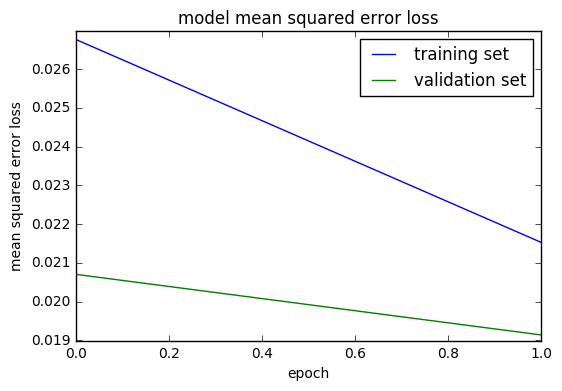

In [3]:
import random
import time

import matplotlib.pyplot as plt



def generate_arrays_from_file(split_start, split_end, validationSet):
    while 1: 
        with open(csv_filename_random, 'r') as f:
            reader = csv.reader(f)
            firstPass = True
            
            rangeStart = int(split_start*row_count) ## 0 for train set
            
            if validationSet:
                rangeEnd = rangeStart + nb_val_samples
            else:
                rangeEnd = rangeStart + samples_per_epoch
            #time.sleep(5)
            print("rangeStart", rangeStart)
            print("rangeEnd", rangeEnd)
            print ("Nr. of rows to go through: ", rangeEnd-rangeStart)
            
#             X_data = np.empty(shape=[batch_size, example_img.shape[0], example_img.shape[1], example_img.shape[2]])
#             X_data[None,:,:,:] = X_data[None,:,:,:].astype('float32')
#             y_data = np.zeros(batch_size)
#             y_data = y_data.astype('float32')
#             index_xy = 0
                

            for index, row in enumerate(reader):
                
                # range (rangeStart, rangeEnd):
                if (index!= 0 and index >= rangeStart and index <= rangeEnd):
#                     print ("index :", index)
                    #random_row_index = index
                    
#                     random_row_index = random.randrange(rangeStart+1, rangeEnd) #don't use first row
#                     print ("Random row index: ", random_row_index)


    #                 #get the random row;
    #                 for i, row in enumerate(reader):
    #                     if i == random_row_index:
    #                         random_row = row
    #                         break

                    #enter every batch size, incl. first pass
                    if ((index % batch_size) == 0 or firstPass):
                        print("In batch and firstPass: ", firstPass)

                        #don't yield during first pass
                        if index != 0 and not firstPass:
                            print ("in yield with index ", index)
    #                       STOP: Do not change the tests below. Your implementation should pass these tests. 
                            assert(X_data.shape[0] == y_data.shape[0]), "The number of images is not equal to the number of labels."
                            assert(X_data.shape[1:] == (160,320,3)), "The dimensions of the images are not 32 x 32 x 3."
    #                       STOP: Do not change the tests below. Your implementation should pass these tests. 
#                             assert(math.isclose(np.min(X_data), -0.5, abs_tol=1e-5) and math.isclose(np.max(X_data), 0.5, abs_tol=1e-5)), "The range of the training data is: %.1f to %.1f" % (np.min(X_data), np.max(X_data))
                            yield X_data, y_data
                        X_data = np.empty(shape=[batch_size, example_img.shape[0], example_img.shape[1], example_img.shape[2]])
    #                     X_data = X_data.astype('uint8')
    #                     X_data[None,:,:,:] = X_data[None,:,:,:].astype('uint8')
                        X_data[None,:,:,:] = X_data[None,:,:,:].astype('float32')

                        y_data = np.zeros(batch_size)
                        y_data = y_data.astype('float32')
                        index_xy = 0

#                     print("filepath: ", train_data_folder+row[0])
                    image = np.asarray(Image.open(train_data_folder+row[0]).convert('RGB'))
    #                 image = image.astype('uint8')
#                     time.sleep(1)

            
                    
                    #normalizing the image
                    image = image.astype('float32')
#                   image = image/255-0.5  
                    #image = image - 128 
                    
                    # X_data[None,:,:,:].astype('uint8')
                    X_data[index_xy]= image
                    X_data = X_data.astype('float32')
                    y_data[index_xy]=row[3]
                    firstPass = False
                    index_xy += 1

#                     print ("\n random row filename: ", row[0])
#                     print("\n steering angle: ", y_data[index_xy])


    #                 print("X_data shape")
    #                 print(X_data.shape)
    #                 print("y_data")
    #                 print(y_data.shape)

    #                 print("This is the line.")
    #                 print(random_row[3])
#     #                 print("This is the filename")
#     #                 print(str(train_images_filenames[random_row_index-1]))
#                     print("This is index_xy")
#                     print(index_xy)
    #                 print("This is index_xy shap eof Xtest new img")
    #                 print(X_data[index_xy].shape)
    #                 print(type(X_data[index_xy]))
    #                 print(type(image))




    #                 plt.title(str(random_row(0)))
    #                 plt.imshow(image)
    #                 plt.show()
#                     time.sleep(1) # delays for 5 seconds

#                     plt.imshow(X_data[index_xy])
#                     plt.show()



with open(csv_filename_random, 'r') as f:
        reader = csv.reader(f)
        row_count = sum(1 for row in reader) 
        print ("Row count: ", row_count)

nb_epoch=2
train_perc= 0.8 ##split between training and validation set. 1-train_perc = validation_perc
batch_size = 128 #128 #7936

samples_per_epoch = batch_size * int(row_count*train_perc/batch_size) ##ensure that (samples per epoch)%(batch_size) == 0 
print("samples_per_epoch: ", samples_per_epoch)
nb_val_samples = batch_size * int(row_count*(1-train_perc)/batch_size)
print("nb_val_smaples: ", nb_val_samples)

#int(row_count*train_perc)
# history = model.fit_generator(generate_arrays_from_file(0,train_perc), samples_per_epoch=100, nb_epoch=1, verbose=1, validation_data=generate_arrays_from_file(val_perc, 1),
# nb_val_samples=row_count*val_perc)

history = model.fit_generator(
    generate_arrays_from_file(0,train_perc, False),
    samples_per_epoch=samples_per_epoch,
    nb_epoch=nb_epoch, 
    #verbose =1)
    verbose=1,
    validation_data=generate_arrays_from_file(train_perc, 1, True),
    nb_val_samples=nb_val_samples) 


### plot the training and validation loss for each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()
# history = model.fit_generator(generate_arrays_from_file(), samples_per_epoch=1000, nb_epoch=2, verbose=1)

# history = model.fit_generator(generate_arrays_from_file(), samples_per_epoch=10000, nb_epoch=10, verbose=1)


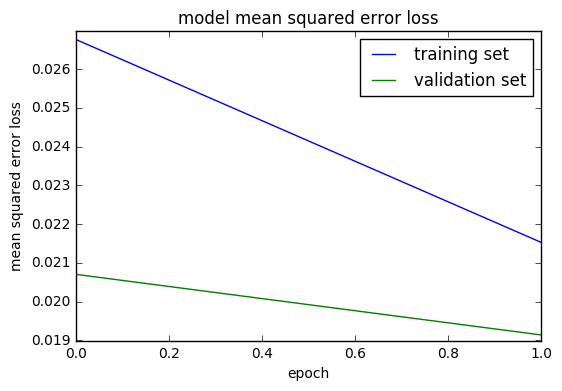

In [4]:
### plot the training and validation loss for each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

In [7]:
#SAVE THE MODEL
# serialize model to JSON
model_json_nvidia_3 = model.to_json()
with open("model_nvidia_3.json", "w") as json_file:
    json_file.write(model_json_nvidia_3)
# serialize weights to HDF5
# model.save_weights("model_nvidia_3.h5")
model.save('model_nvidia3.h5')
print("Saved model to disk")
 
# later...

Saved model to disk


In [ ]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)

print "%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100)